<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 

# Домашка №4: визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. Именно этим мы сейчас продолжим заниматься. В этот раз с картинками! 

В большинстве заданий для получения заветных баллов придётся не только завести код, но и написать свои мысли в поле __Ответ__. Сочинения надо писать прямо в текстовых ячейках, сразу после слова __Ответ__.

Для начала подгрузите все необходимые библиотеки: `math`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn` и включите опцию, отвечающую за прорисовку картинок прямо в питонячей тетрадке.

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels

Подгрузите данные профилей и данные по фотографиям

In [2]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('./vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('./vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [3]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

,Unnamed: 0_x,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text,photo_text_len_cnt,photo_yer_mean,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,1.333333,0.0,0.0,0.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,2.0,1.0,0.105263,0.0,,0.0,3.166667,0.0,0.0,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,0.0,0.0,0.000000,0.0,,0.0,2.333333,0.0,0.0,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,12.500000,0.0,0.0,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,0.0,0.0,0.000000,0.0,,0.0,8.750000,0.0,0.0,0.0


Давайте посмотрим на все названия колонок, которые есть в таблице. 

In [4]:
df.columns

Index(['Unnamed: 0_x', 'uid', 'Unnamed: 0.1', 'first_name', 'last_name',
       'is_closed', 'city', 'home_town', 'male_dummy', 'relation_cat',
       'relation_partner', 'byear', 'bmonth', 'bday', 'country',
       'facebook_dummy', 'instagram_dummy', 'skype_dummy', 'twitter_dummy',
       'home_phone_dummy', 'mobile_phone_dummy', 'site_dummy', 'folowers_cnt',
       'university_str', 'faculty_str', 'about_str', 'activities_str',
       'books_str', 'interests_str', 'movies_str', 'music_str', 'quotes_str',
       'tv_str', 'games_str', 'can_post_dummy', 'can_see_all_posts_dummy',
       'can_see_audio_dummy', 'can_write_private_message_dummy',
       'has_mobile_dummy', 'has_ava_dummy', 'wall_comments_dummy',
       'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt',
       'groups_cnt', 'mutual_friends_cnt', 'photos_cnt', 'subscriptions_cnt',
       'user_photos_cnt', 'videos_cnt', 'pages_cnt', 'alco_love_cat',
       'smoke_love_cat', 'religion_str', 'inspired_by

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, лайков, репостов и тд

In [5]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

__[2]__ __Вытащите из переменных счётчиков только те, которые отвечают за фото.__ Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?


__Ответ:__ Неинформативны однозначно vk_photo..., потому что у них лишь одно значение. user_photos_cnt и photo_text_len_cnt имеют сильно выраженное одно значение и очень мало всех остальных наблюдей. И в остальных есть выбросы, кроме photo_like_cnt, где распределение похоже на экспоненциальное (поскольку видим прямую на логарифмированном графике).

In [6]:
photos_var_cnt = [column for column in df.columns if column[-3:] == 'cnt' and 'photo' in column]

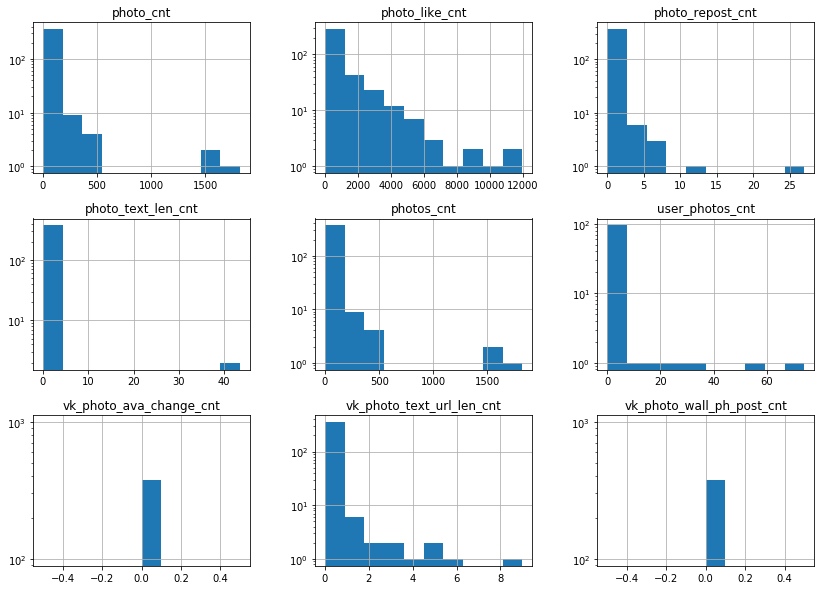

In [7]:
df[photos_var_cnt].hist(log=True, figsize=(14, 10))
plt.show()

__[2]__ Кто больше постит фотографий, девушки или парни? чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

Вы уже до этого искали ответы на подобные вопросы. Тут от вас требуется построить картинку, на которй будет чётко видно что происходит с женщинами, а что с мужчинами (своя гистограмма для каждой фичи раскрашенная по мужчинам и женщинам). Попробуйте построить все $4$ картинки в рамках одной с помощью `axis`.

In [8]:
def hist_by_var_ax(var, num):
    ax[num].hist([df[df.male_dummy == 1][var], df[df.male_dummy == 0][var]], log=True, bins=25)
    ax[num].legend(['male', 'female'])

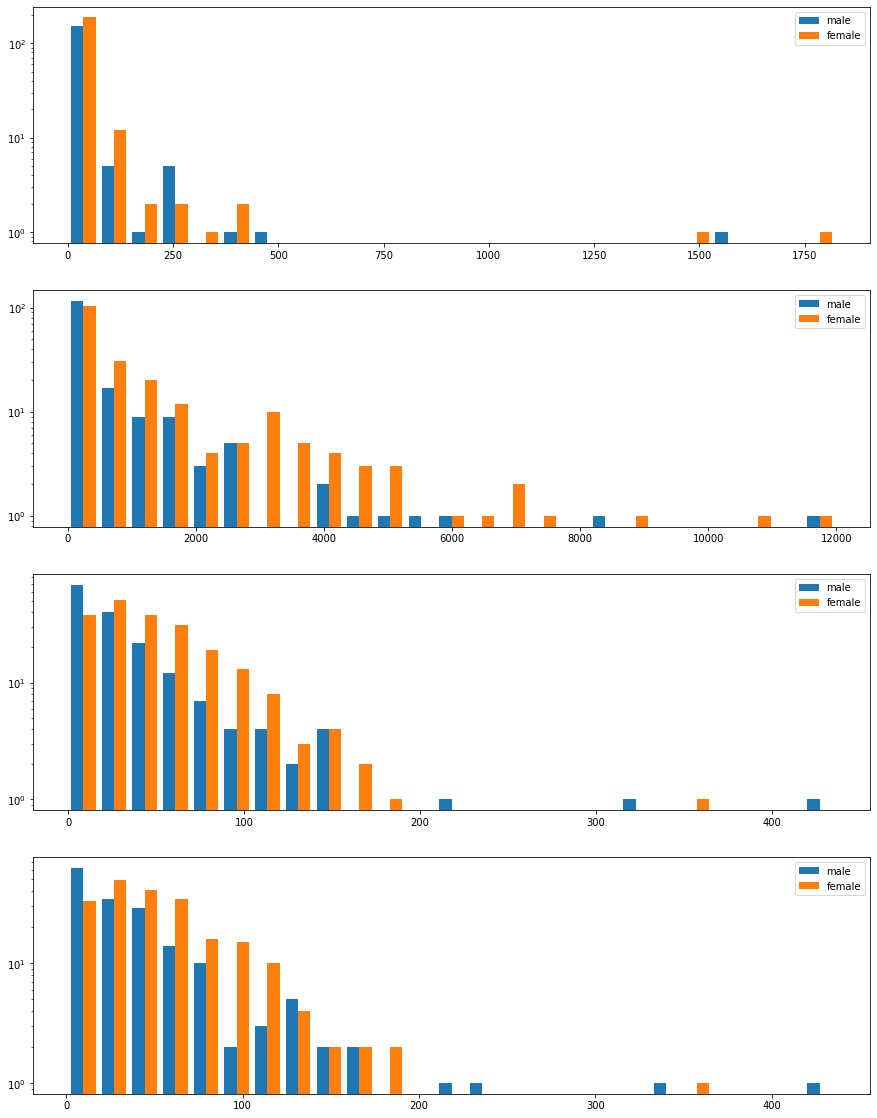

In [9]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 20))
for num, var in enumerate(['photo_cnt', 'photo_like_cnt', 'photo_like_median', 'photo_like_mean']):
    hist_by_var_ax(var, num)
plt.show()


Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [10]:
vars_interesting = photos_var_cnt + ['male_dummy', 'friends_cnt', 'gifts_cnt']

In [11]:
df[vars_interesting].head()

,photos_cnt,user_photos_cnt,photo_cnt,photo_like_cnt,photo_repost_cnt,photo_text_len_cnt,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt,male_dummy,friends_cnt,gifts_cnt
0,4.0,NaN,4.0,309.0,0.0,0.0,0.0,0.0,0.0,0,298.0,NaN
1,19.0,NaN,19.0,2894.0,2.0,0.0,0.0,0.0,0.0,0,408.0,203.0
2,7.0,NaN,7.0,2406.0,0.0,0.0,0.0,0.0,0.0,1,2969.0,NaN
3,50.0,NaN,50.0,1310.0,0.0,0.0,0.0,0.0,0.0,0,214.0,24.0
4,35.0,NaN,35.0,1375.0,0.0,0.0,0.0,0.0,0.0,1,336.0,227.0


__[2]__ Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

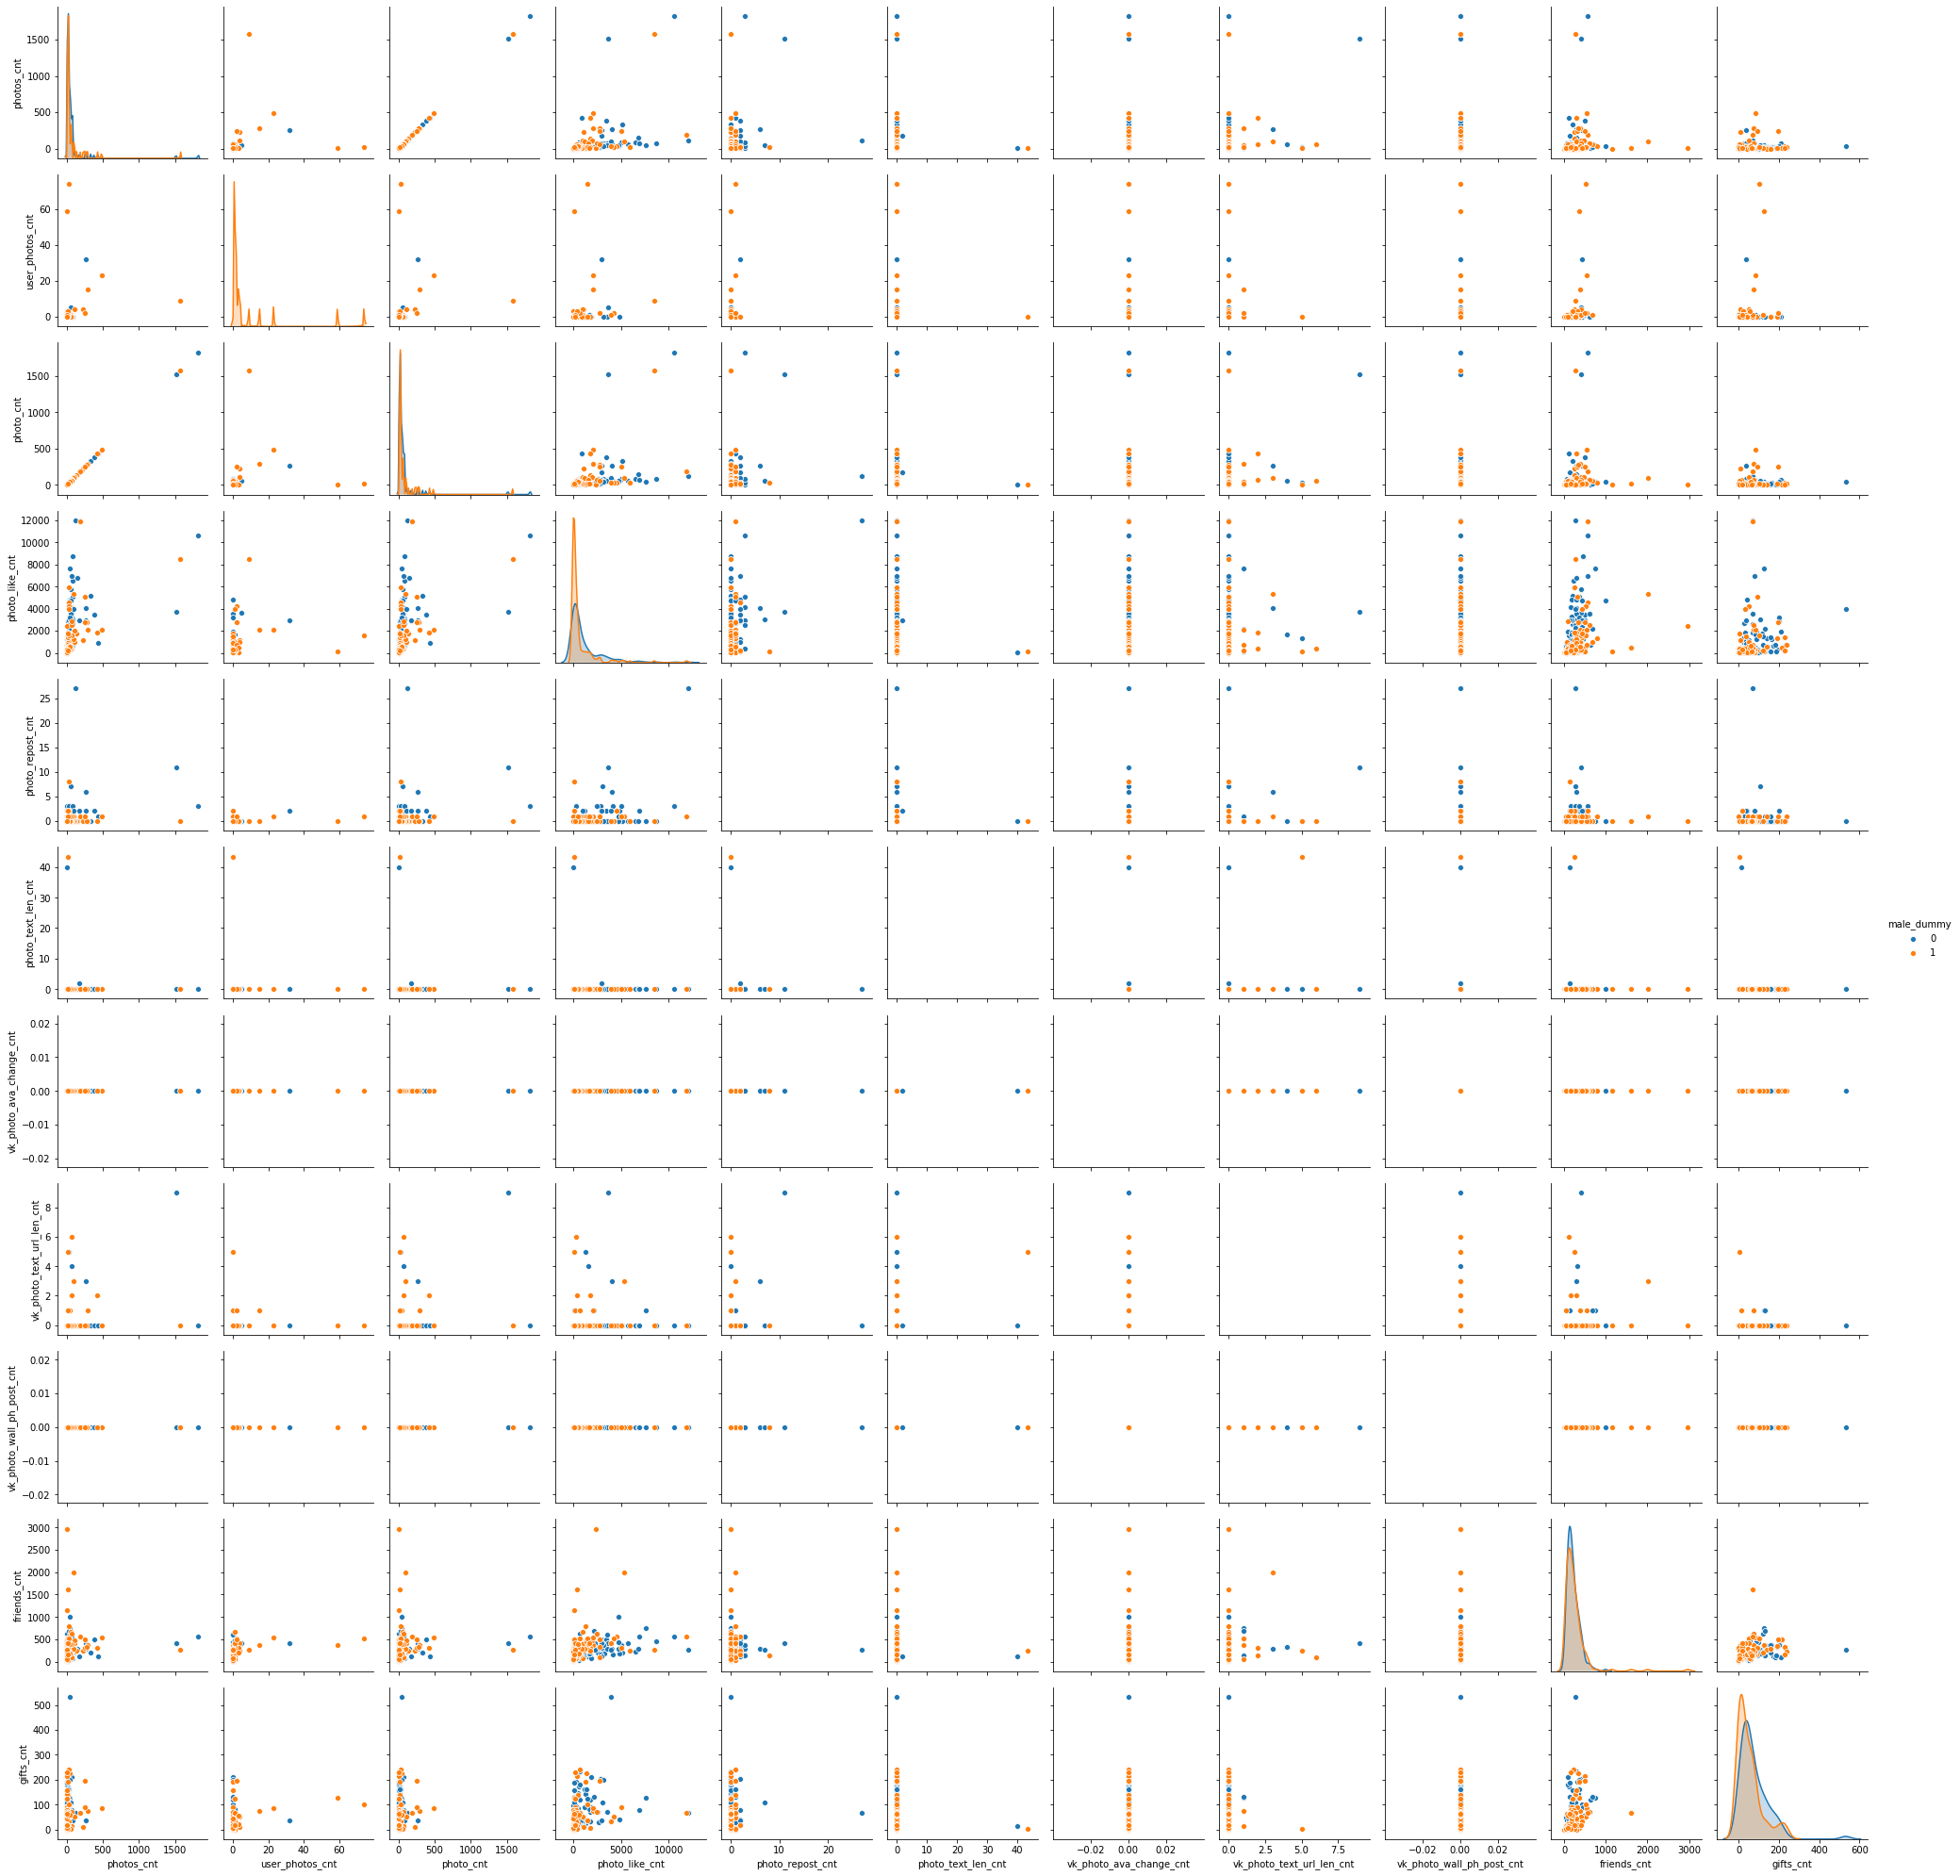

In [12]:
sns.pairplot(df[vars_interesting], hue='male_dummy', diag_kind='kde')
plt.show()

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

In [13]:
df_na_zero = df[vars_interesting].fillna(0)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

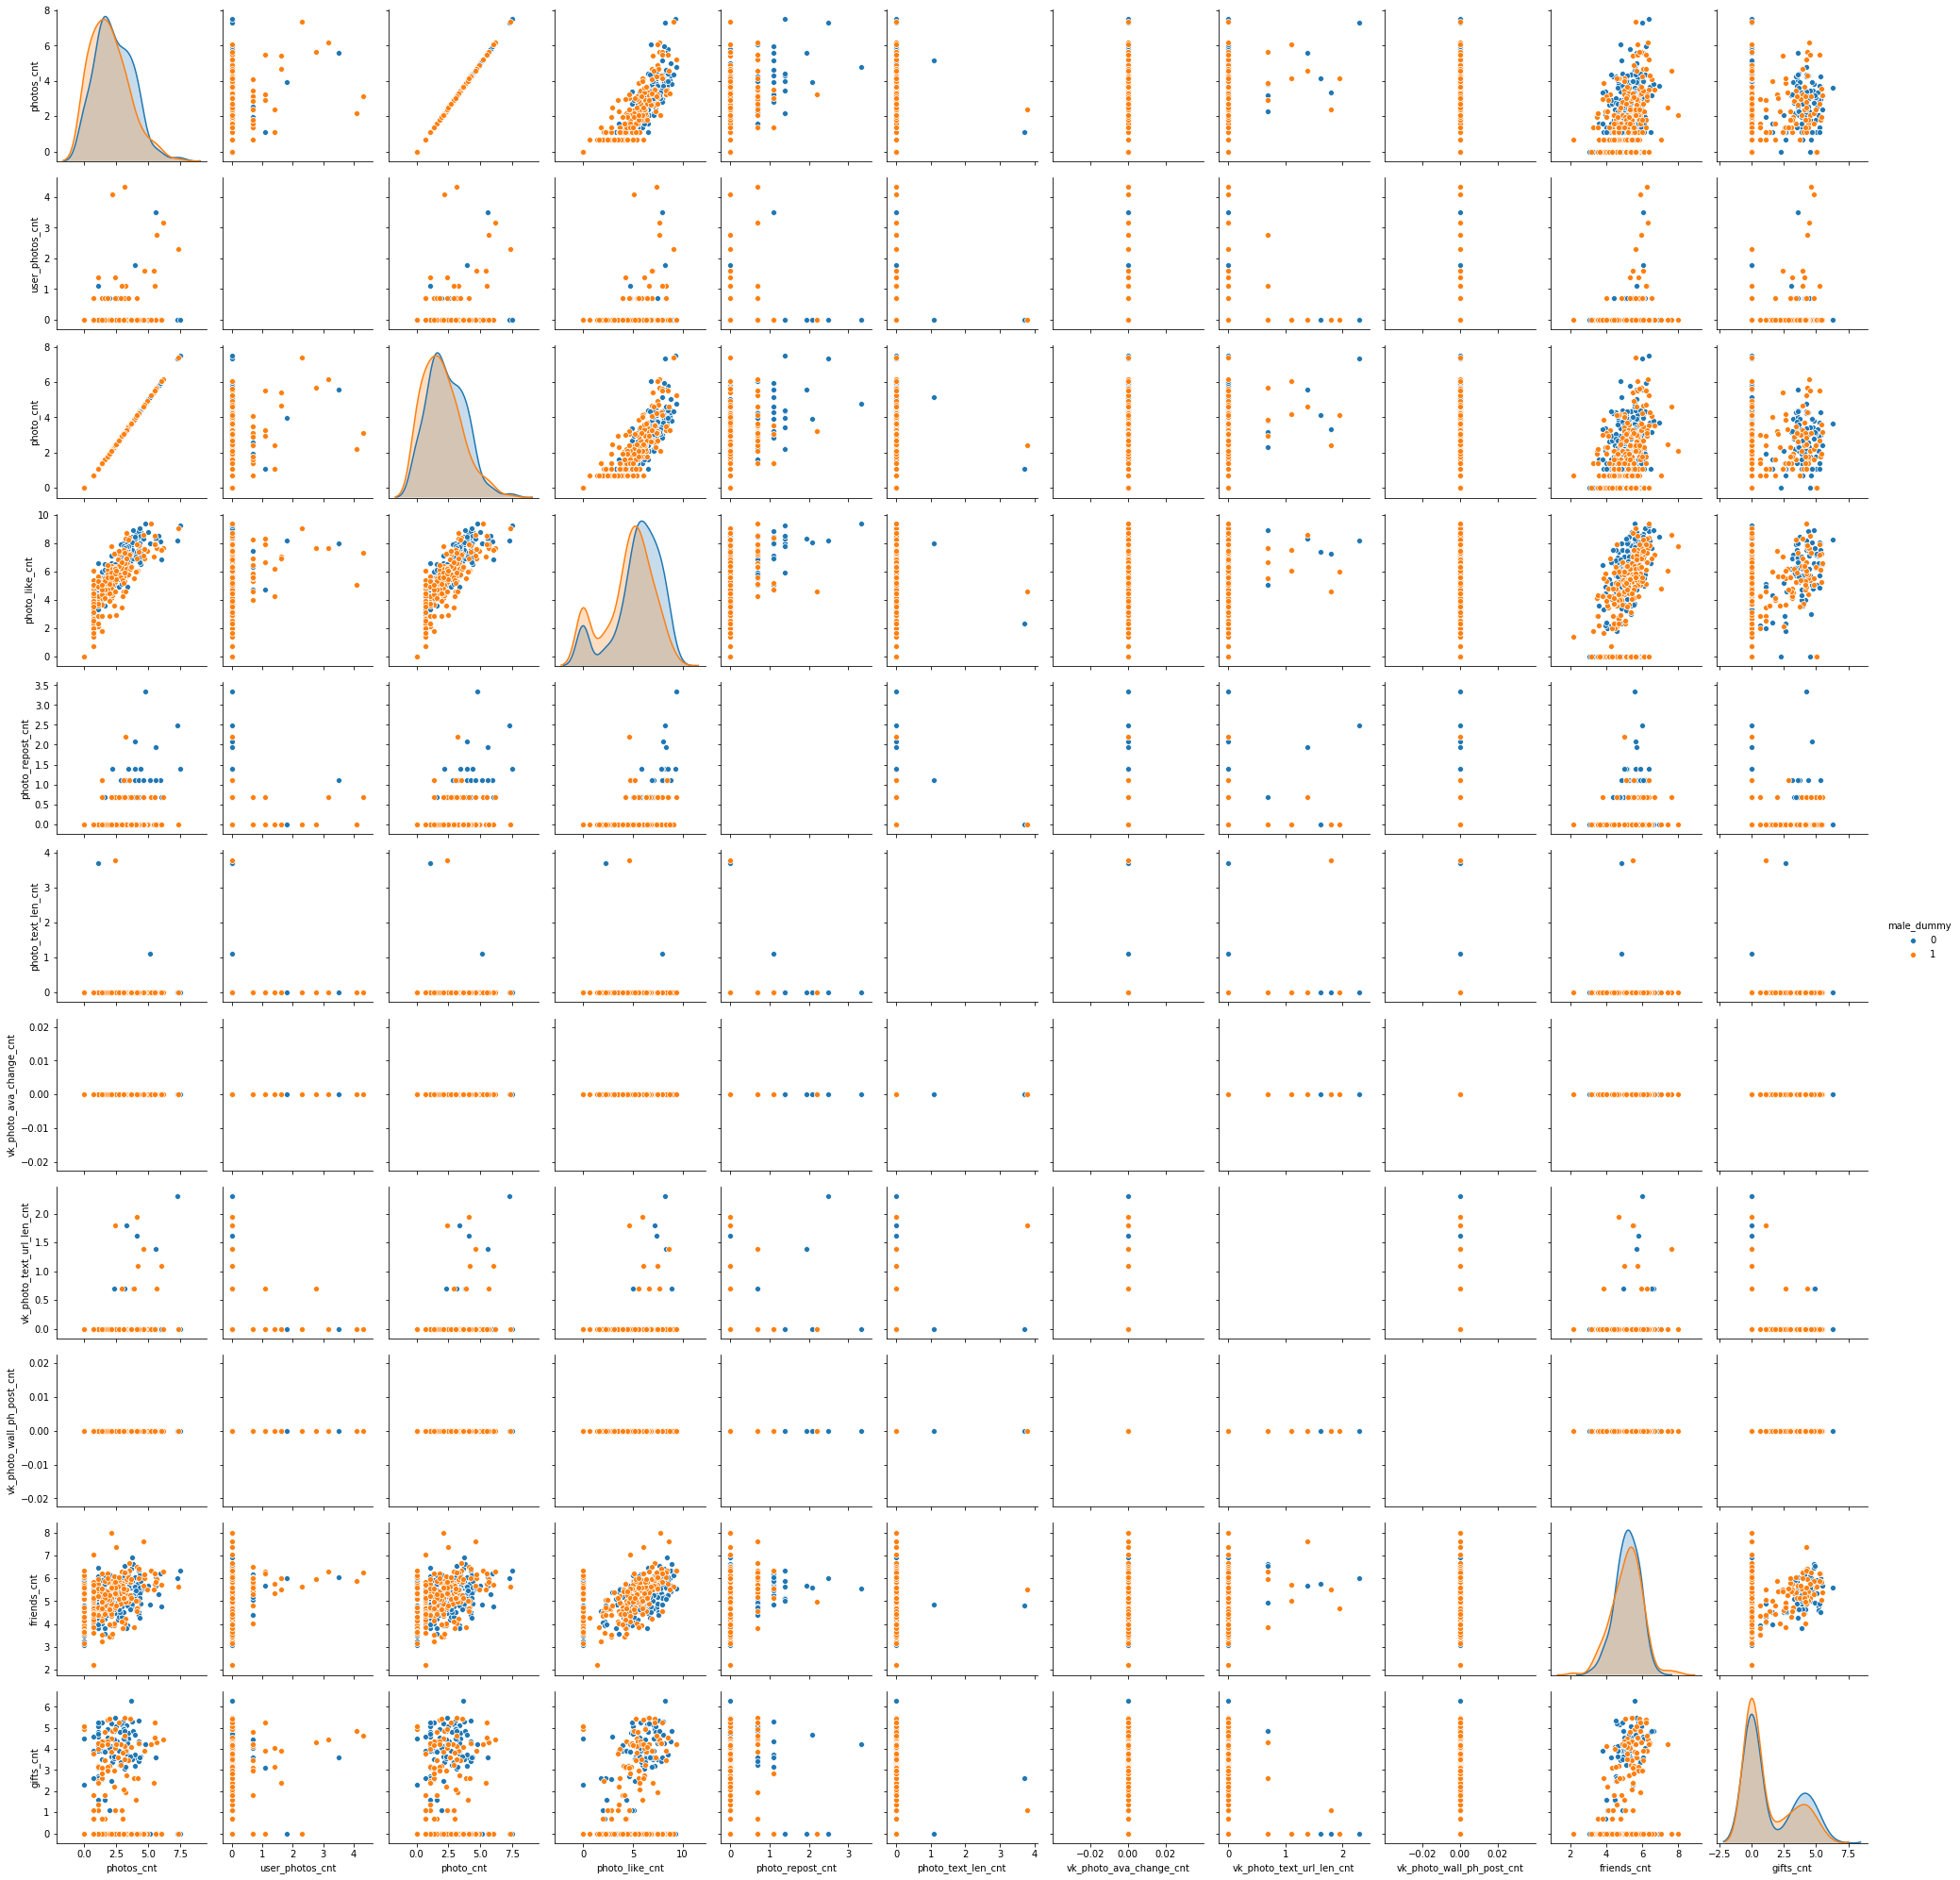

In [14]:
sns.pairplot(df_na_zero, hue='male_dummy', diag_kind='kde')
plt.show()

__[1]__ __Сделайте датасет `df_na_drop`. Для этого проделайте всё то же самое, что выше, но вместо того, чтобы заполнять пропуски нулями - выбросите их.__

In [15]:
df_na_drop = df[vars_interesting].dropna()

for column in df_na_drop.columns:
    if column == 'male_dummy':
        continue
    df_na_drop[column] = df_na_drop[column].map(lambda x: math.log(1 + x))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

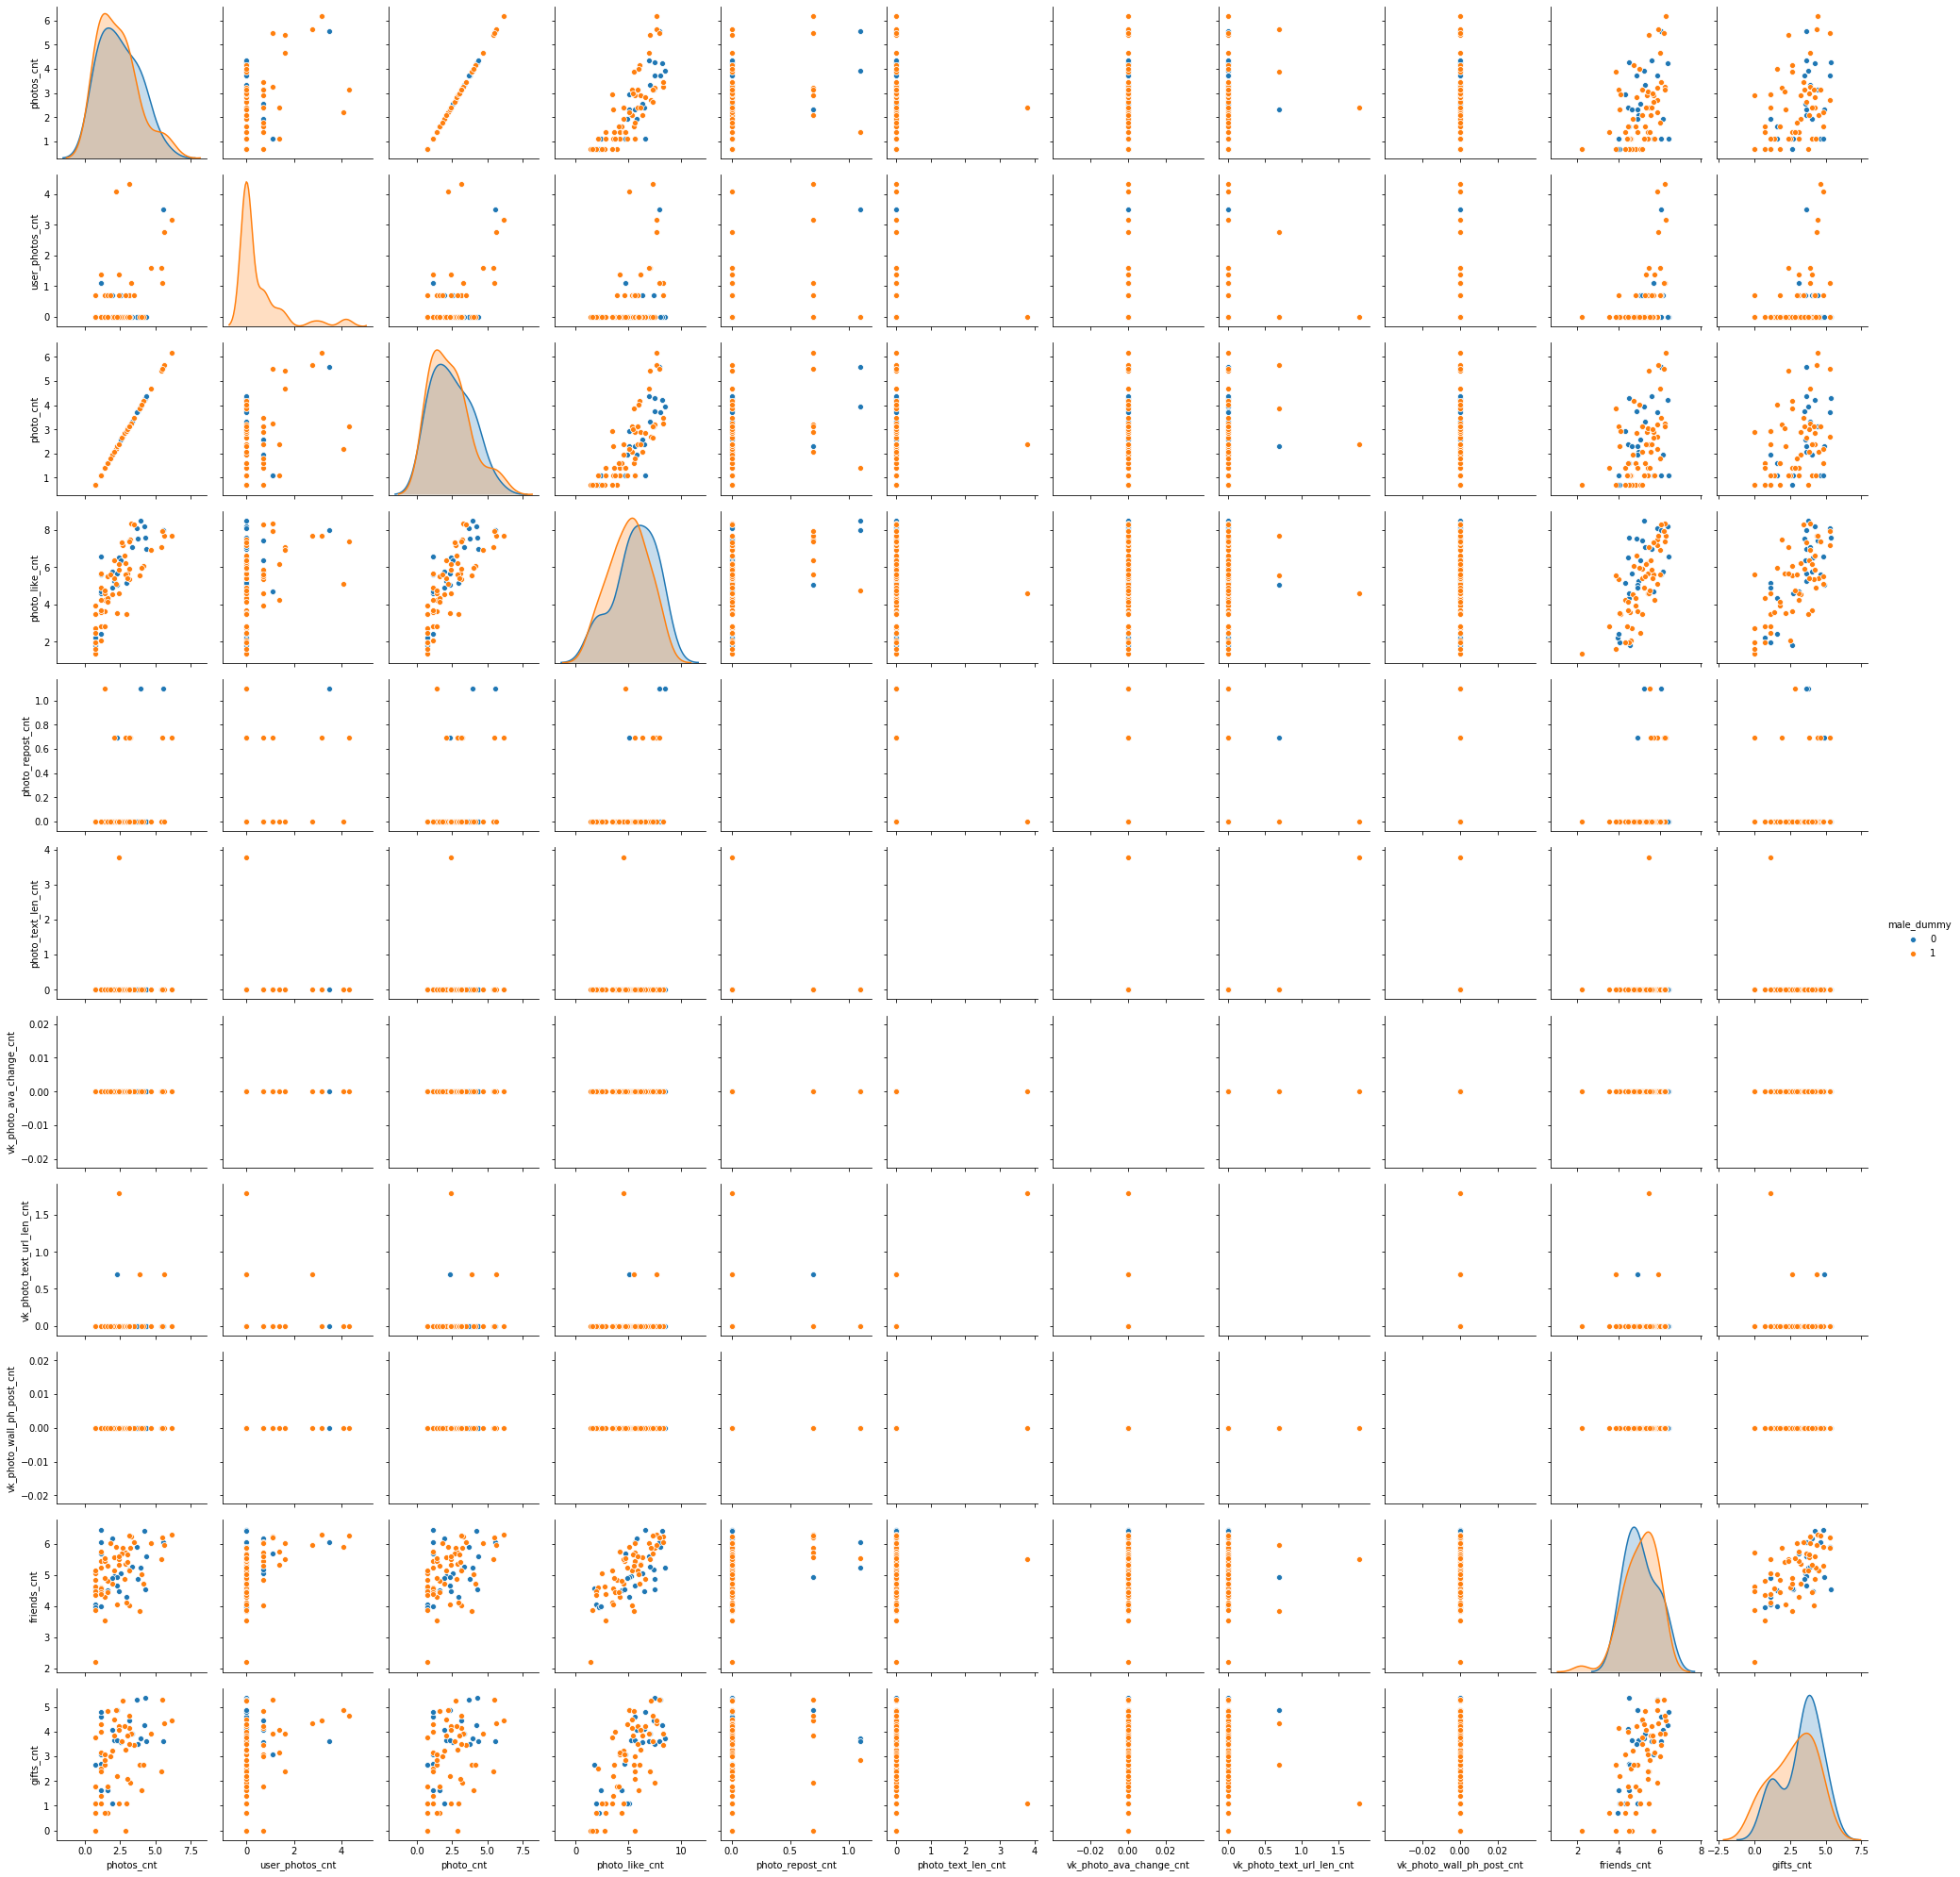

In [16]:
sns.pairplot(df_na_drop, hue='male_dummy', diag_kind='kde')
plt.show()

__[3]__ Дайте ответы на следущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили? 

__Ответ:__   Есть красивая линейная зависимость между количеством фотографий и количеством подарков. Также между количеством друзей и количеством лайков. И также между количеством друзей и подарков. Если точки распределены вдоль прямой, тогда можно предположить о линейной связи, что и наблюдаем в этих случаях.

* Eсть ли тут нелинейные зависимости?

__Ответ:__   Во многих случаях без линейной зависимости мы просто не видим никакой зависимости. Но между количеством фотографий и лайками фотографий есть явно нелинейная зависимость (из последнего графика). Количество лайков возврастает быстрее количества фотографий.

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__  Да, есть. 

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__  Количество лайков под фотографиями растёт экспоненциально от числа фотографий. Среднее значение лайков у девушек выше, чем у юношей. Чем больше друзей, тем больше ожидаем подарков в соцсети.



__[2]__ Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

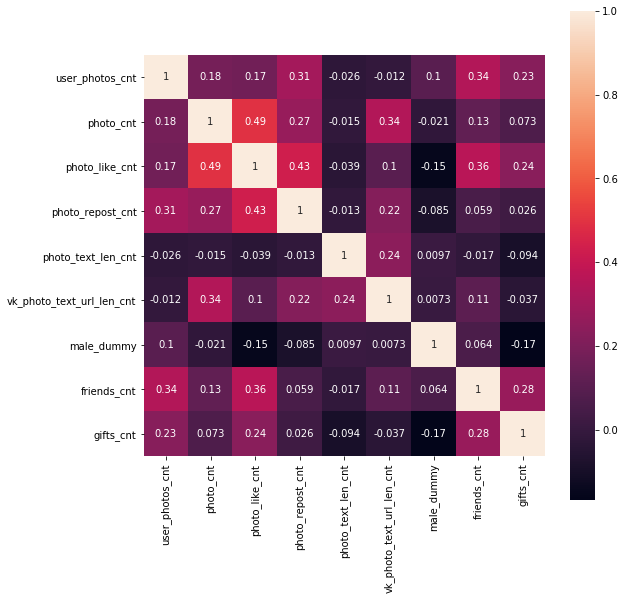

In [17]:
plt.figure(figsize=(9,9))
useless = ['vk_photo_wall_ph_post_cnt', 'vk_photo_ava_change_cnt', 'photos_cnt']
# photo_cnt и photos_cnt почти одно и то же
sns.heatmap(df[vars_interesting].drop(useless, axis=1).corr(), annot=True, square=True)
plt.show()

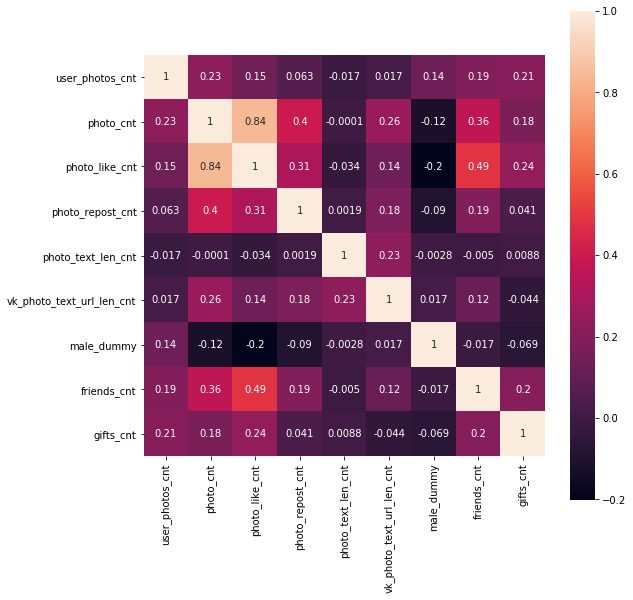

In [18]:
plt.figure(figsize=(9,9))
useless = ['vk_photo_wall_ph_post_cnt', 'vk_photo_ava_change_cnt', 'photos_cnt']
sns.heatmap(df_na_zero.drop(useless, axis=1).corr(), annot=True, square=True)
plt.show()

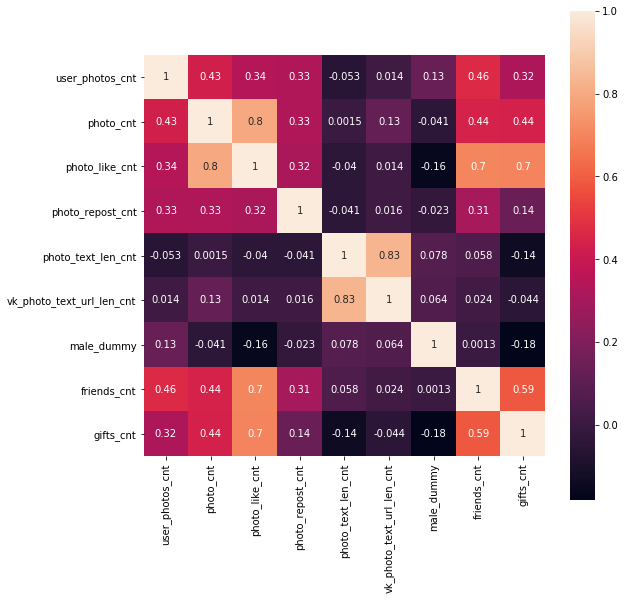

In [19]:
plt.figure(figsize=(9,9))
useless = ['vk_photo_wall_ph_post_cnt', 'vk_photo_ava_change_cnt', 'photos_cnt']
sns.heatmap(df_na_drop.drop(useless, axis=1).corr(), annot=True, square=True)
plt.show()

__[2]__ Насколько сильно корреляционные матрицы различаются между собой? Почему? 

__Ответ:__ Различаются значительно, так как логарифмирование стабилизирует данные, защищая от выбросов. А удаление нулей тоже помогает избавиться от влиятельных значений (нулей). Поэтому на последней матрице корреляций чаще всего наибольшие значения.

__[2]__ Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ -0.2 на второй матрице между полом и количеством лайков. У девушек больше лайков. Высокая корреляция между количеством фотографий и лайками под фотографиями. Довольно логично, потому что количество лайков считывается со всех фотографий. Корреляция 0.59 между друзьями и подарками. Друзья любят дарить подарки. И также высокие корреляции между количеством друзей, подарками с лайками под фотографиями. Они связаны сильно между собой, так как в целом отображают популярность профиля. И очень высокая между длиной текста под фотографиями и количеством ссылок. Наверняка, длина текста увеличивается за счёт ссылок.

__[2]__ Дамми-переменная это переменная, которая принимает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. 

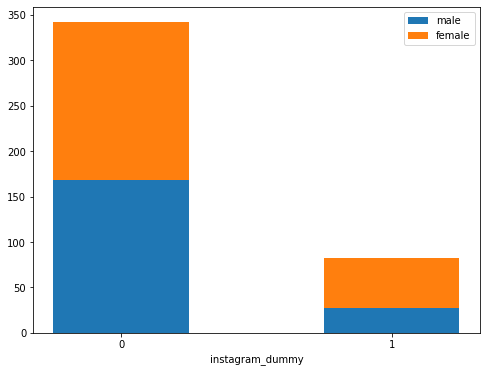

In [20]:
plt.figure(figsize=(8,6))
male = df[(df.male_dummy == 1)]
female = df[(df.male_dummy == 0)]
pl1 = plt.bar([0, 1], [len(male[male.instagram_dummy == 0]), len(male[male.instagram_dummy == 1])], width=0.5)
pl2 = plt.bar([0, 1], [len(female[female.instagram_dummy == 0]), len(female[female.instagram_dummy == 1])], 
             bottom=[len(male[male.instagram_dummy == 0]), len(male[male.instagram_dummy == 1])], width=0.5)
plt.xticks([0, 1])
plt.xlabel('instagram_dummy')
plt.legend(('male', 'female'))
plt.show()

Правда ли, что девушки чаще указывают наличие инстаграмма на своей страничке?

__Ответ:__ Правда. Соотношение полов примерно равное, хоть и девушек побольше. И мы видим, что юноши реже указывают наличие инстаграма.

__[1]__  Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разбиритесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему? 

__Ответ:__  Вывод нельзя сделать даже исходя из количества учащихся, указавших в своём профиле политические взгляды. Но если смотреть на пропорции, тогда 5/12 имеют умеренные взгляды и лишь 1/6 либеральные.

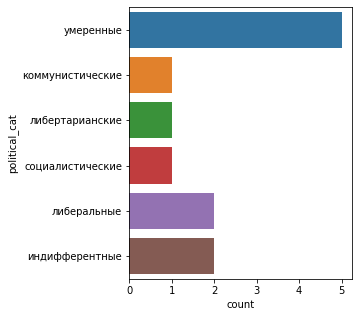

In [21]:
plt.figure(figsize=(4,5))
sns.countplot(y=df['political_cat'])
plt.show()

__[1]__ Как политические взгляды распределены по полам?  Постройте для этого также столбиковую диаграмму, на которой каждый стобик будет разбит на два цвета: мужчины и женщины. 

__Ответ:__  Статус поставили 7 мужчин и 5 женщин. Умеренные взгляды распределились примерно поровну. Но из коммунистов только девушки, а из либертарианцев и социалистов только по одному юноше. Распределение 1 к 1 с индифферентными взглядами и либеральными.

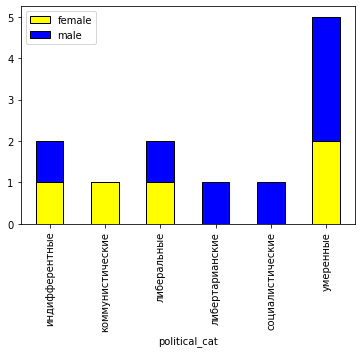

In [22]:
male = df.groupby('political_cat').sum()['male_dummy']
female = df.groupby('political_cat').count()['male_dummy'] - df.groupby('political_cat').sum()['male_dummy']
ix = male.index
plt.bar(x=ix, height=female, width=0.5, color='yellow', edgecolor='black')
plt.bar(x=ix, height=male, bottom=female, width=0.5, color='blue', edgecolor='black')
plt.xticks(rotation='vertical')
plt.xlabel('political_cat')
plt.legend(['female', 'male'])
plt.show()

__[n]  Удиви нас. Попробуй найти в данных какую-то классную особенность и визуализируйте её. Если у тебя это получится, мы поставим дополнительные баллы.__ Если вы найдёте полную фигню (сколько всего друзей у Маши или типа того), баллов не будет. Найденный факт реально должен выносить мозг и сносить крышу.

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ и думая что дышат просто так, они внезапно попадают в так такого же неровного дыханья

Настрадался? Выскажи всё, что думаешь обо всём этом [в анонимке по четвёртой домашке.](https://docs.google.com/forms/d/e/1FAIpQLSeumKE6K8fB7xZsXneN1KjkV9y_gmLl6wGG7MDiY84HWBUsNg/viewform) 